# A Quick and Dirty Bayesian Election Model for 2022

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Initialise" data-toc-modified-id="Initialise-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Initialise</a></span><ul class="toc-item"><li><span><a href="#Import-necessary-python-modules" data-toc-modified-id="Import-necessary-python-modules-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Import necessary python modules</a></span></li><li><span><a href="#Locations" data-toc-modified-id="Locations-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Locations</a></span></li><li><span><a href="#Plotting-setup" data-toc-modified-id="Plotting-setup-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Plotting setup</a></span></li><li><span><a href="#PyMC-setup" data-toc-modified-id="PyMC-setup-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>PyMC setup</a></span></li><li><span><a href="#Useful-plotting-functions" data-toc-modified-id="Useful-plotting-functions-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Useful plotting functions</a></span></li></ul></li><li><span><a href="#Get-the-data-we-will-use-for-analysis" data-toc-modified-id="Get-the-data-we-will-use-for-analysis-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Get the data we will use for analysis</a></span><ul class="toc-item"><li><span><a href="#Voting-data" data-toc-modified-id="Voting-data-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Voting data</a></span></li><li><span><a href="#Seats-won-data" data-toc-modified-id="Seats-won-data-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Seats won data</a></span></li><li><span><a href="#Minor-seat-data" data-toc-modified-id="Minor-seat-data-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Minor seat data</a></span></li><li><span><a href="#Polling-History" data-toc-modified-id="Polling-History-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Polling History</a></span></li><li><span><a href="#Current-polling-data" data-toc-modified-id="Current-polling-data-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Current polling data</a></span></li></ul></li><li><span><a href="#Let's-look-at-some-of-the-relationships-before-building-a-model" data-toc-modified-id="Let's-look-at-some-of-the-relationships-before-building-a-model-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Let's look at some of the relationships before building a model</a></span><ul class="toc-item"><li><span><a href="#How-2pp-polling-errors-are-distributed-around-2pp-Election-Results" data-toc-modified-id="How-2pp-polling-errors-are-distributed-around-2pp-Election-Results-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>How 2pp polling errors are distributed around 2pp Election Results</a></span></li><li><span><a href="#2pp-to-seat-conversion-performance-(adjusted-for-minor-parties)" data-toc-modified-id="2pp-to-seat-conversion-performance-(adjusted-for-minor-parties)-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>2pp to seat conversion performance (adjusted for minor parties)</a></span></li><li><span><a href="#Conversion-of-&quot;others&quot;-primary-votes-to-seats-for-&quot;others&quot;" data-toc-modified-id="Conversion-of-&quot;others&quot;-primary-votes-to-seats-for-&quot;others&quot;-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Conversion of "others" primary votes to seats for "others"</a></span></li><li><span><a href="#Polling-errors-with-&quot;others&quot;-vote" data-toc-modified-id="Polling-errors-with-&quot;others&quot;-vote-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Polling errors with "others" vote</a></span></li></ul></li><li><span><a href="#Bayesian-model" data-toc-modified-id="Bayesian-model-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Bayesian model</a></span><ul class="toc-item"><li><span><a href="#Inputs" data-toc-modified-id="Inputs-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Inputs</a></span></li><li><span><a href="#The-model" data-toc-modified-id="The-model-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>The model</a></span></li><li><span><a href="#Graphical-representation-of-the-model" data-toc-modified-id="Graphical-representation-of-the-model-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Graphical representation of the model</a></span></li><li><span><a href="#Sampling---conditioning-the-data-to-the-model" data-toc-modified-id="Sampling---conditioning-the-data-to-the-model-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Sampling - conditioning the data to the model</a></span></li><li><span><a href="#Charting-the-results" data-toc-modified-id="Charting-the-results-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>Charting the results</a></span></li></ul></li><li><span><a href="#Test-bed" data-toc-modified-id="Test-bed-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Test bed</a></span></li></ul></div>

## Initialise

### Import necessary python modules

In [1]:
# Data science imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pymc as pm
import arviz as az

# system imports
from io import StringIO
from pathlib import Path

# local imports
import common

In [2]:
%load_ext watermark
%watermark -u -n -t -v -iv -w

Last updated: Mon May 16 2022 22:28:14

Python implementation: CPython
Python version       : 3.10.4
IPython version      : 8.3.0

numpy     : 1.22.3
matplotlib: 3.5.2
arviz     : 0.12.0
pandas    : 1.4.2
pymc      : 4.0.0b6

Watermark: 2.3.0



### Locations

In [3]:
# path to the model data 
PUBLIC_DATA_DIR = '../data/'
Path(PUBLIC_DATA_DIR).mkdir(parents=True, exist_ok=True)

PRIVATE_DATA_DIR = '../historical-data/'
Path(PRIVATE_DATA_DIR).mkdir(parents=True, exist_ok=True)


### Plotting setup

In [4]:
plt.style.use('./markgraph.mplstyle')

### PyMC setup

In [5]:
az.style.use("arviz-darkgrid")

### Useful plotting functions

In [6]:
def annotate_dots(ax, x, y, s):
    # annotate scatter plot dots
    for x_, y_, s_ in zip(x, y, [f'{t}' for t in s]):
        ax.text(x_, y_, s_, ha='left', va='bottom')

In [7]:
def regression_line(ax, x, y):
    # place a regression line of the plot
    m, b = np.polyfit(x, y, 1)
    regression_text = f'Regression: y = {m:0.3f}x {"+ " if b >=0 else ""}{b:0.3f}'
    x_r = np.array(sorted(x))
    y_r = (m * x_r) + b
    ax.plot(x_r, y_r, lw=0.75, c="#dd0000")
    return regression_text

In [8]:
def y_eq_x_line(ax):
    # place an y=x line on the plot ...
    lims = [
        np.min([ax.get_xlim(), ax.get_ylim()]), 
        np.max([ax.get_xlim(), ax.get_ylim()]),  
    ]
    ax.plot(lims, lims, lw=0.75, c='#dd0000')
    ax.set_xlim(lims)
    ax.set_ylim(lims)

## Get the data we will use for analysis

### Voting data

In [9]:
historic_vote_data = """
Year    Date         ALP     LP      LNP  NP      CLP  DLP  DEM     GRN     ON   Others GovtBefore GovtAfter Labor2pp
1946    28-Sep-1946  49.7    33.0    -    10.7    -    -    -       -       -    6.6    Labor      Labor     54.1
1949    10-Dec-1949  46.0    39.3    -    10.8    -    -    -       -       -    3.9    Labor      Coalition 49.0
1951    28-Apr-1951  47.7    40.5    -    9.7     -    -    -       -       -    2.1    Coalition  Coalition 49.3
1954    29-May-1954  50.1    38.5    -    8.5     -    -    -       -       -    2.9    Coalition  Coalition 50.7
1955    10-Dec-1955  44.7    39.7    -    7.9     -    5.1  -       -       -    2.6    Coalition  Coalition 45.8
1958    22-Nov-1958  42.9    37.1    -    9.3     -    9.4  -       -       -    1.3    Coalition  Coalition 45.9
1961    09-Dec-1961  48.0    33.5    -    8.5     -    8.7  -       -       -    1.4    Coalition  Coalition 50.5
1963    30-Nov-1963  45.5    37.1    -    8.9     -    7.4  -       -       -    1.0    Coalition  Coalition 47.4
1966    26-Nov-1966  40.0    40.1    -    9.8     -    7.3  -       -       -    2.7    Coalition  Coalition 43.1
1969    25-Oct-1969  47.0    34.8    -    8.6     -    6.0  -       -       -    3.7    Coalition  Coalition 50.2
1972    02-Dec-1972  49.6    32.0    -    9.4     -    5.2  -       -       -    3.7    Coalition  Labor     52.7
1974    18-May-1974  49.3    34.9    -    10.8    -    1.4  -       -       -    3.5    Labor      Labor     51.7
1975    13-Dec-1975  42.8    41.8    -    11.0    0.2  1.3  -       -       -    2.8    Labor      Coalition 44.3
1977    10-Dec-1977  39.6    38.1    -    9.8     0.2  1.4  9.4     -       -    1.4    Coalition  Coalition 45.4
1980    18-Oct-1980  45.1    37.4    -    8.6     0.2  0.3  6.6     -       -    1.7    Coalition  Coalition 49.6
1983    05-Mar-1983  49.5    34.4    -    9.0     0.2  0.2  5.0     -       -    1.7    Coalition  Labor     53.2
1984    01-Dec-1984  47.5    34.1    -    10.6    0.3  0.6  5.4     -       -    1.4    Labor      Labor     51.8
1987    11-Jul-1987  45.8    34.3    -    11.5    0.2  -    6.0     -       -    2.0    Labor      Labor     50.8
1990    24-Mar-1990  39.4    34.8    -    8.4     0.3  -    11.3    1.4     -    4.4    Labor      Labor     49.9
1993    13-Mar-1993  44.9    36.8    -    7.2     0.3  -    3.8     1.9     -    5.2    Labor      Labor     51.4
1996    02-Mar-1996  38.8    38.7    -    8.2     0.4  -    6.8     2.9     -    4.3    Labor      Coalition 46.4
1998    03-Oct-1998  40.1    33.9    -    5.3     0.3  -    5.1     2.6     8.4  4.2    Coalition  Coalition 51.0
2001    10-Nov-2001  37.8    37.1    -    5.6     0.3  -    5.4     5.0     4.3  4.4    Coalition  Coalition 49.0
2004    09-Oct-2004  37.6    40.5    -    5.9     0.3  -    1.2     7.2     1.2  6.0    Coalition  Coalition 47.3
2007    24-Nov-2007  43.4    36.3    -    5.5     0.3  -    0.7     7.8     0.3  5.8    Coalition  Labor     52.7
2010    21-Aug-2010  38.0    30.5    9.1  3.7     0.3  -    0.2     11.8    0.2  6.2    Labor      Labor     50.1
2013    07-Sep-2013  33.4    32.0    8.9  4.3     0.3  0.3  -       8.6     0.2  11.9   Labor      Coalition 46.5
2016    02-Jul-2016  34.7    28.7    8.5  4.6     0.2  -    -       10.2    1.3  11.7   Coalition  Coalition 49.6
2019    18-May-2019  33.34   27.99   8.67 4.51    0.27 -    -       10.40   3.08 11.74  Coalition  Coalition 48.5
"""
# https://en.wikipedia.org/wiki/Two-party-preferred_vote
# https://www.aph.gov.au/About_Parliament/Parliamentary_Departments/Parliamentary_Library/pubs/rp/rp1617/FederalElectionResults

historic_vote_data = pd.read_csv(StringIO(historic_vote_data), 
                                 header=0, index_col=0, 
                                 skipinitialspace=True, sep=' ', 
                                 na_values='-',
                                 parse_dates=['Date'])
historic_vote_data['Coalition2pp'] = 100.0 - historic_vote_data['Labor2pp']
historic_vote_data['CoalitionMargin'] = historic_vote_data.Coalition2pp - historic_vote_data.Labor2pp
historic_vote_data


,Date,ALP,LP,LNP,NP,CLP,DLP,DEM,GRN,ON,Others,GovtBefore,GovtAfter,Labor2pp,Coalition2pp,CoalitionMargin
Year,,,,,,,,,,,,,,,,
1946,1946-09-28,49.70,33.00,NaN,10.70,NaN,NaN,NaN,NaN,NaN,6.60,Labor,Labor,54.1,45.9,-8.2
1949,1949-12-10,46.00,39.30,NaN,10.80,NaN,NaN,NaN,NaN,NaN,3.90,Labor,Coalition,49.0,51.0,2.0
1951,1951-04-28,47.70,40.50,NaN,9.70,NaN,NaN,NaN,NaN,NaN,2.10,Coalition,Coalition,49.3,50.7,1.4
1954,1954-05-29,50.10,38.50,NaN,8.50,NaN,NaN,NaN,NaN,NaN,2.90,Coalition,Coalition,50.7,49.3,-1.4
1955,1955-12-10,44.70,39.70,NaN,7.90,NaN,5.1,NaN,NaN,NaN,2.60,Coalition,Coalition,45.8,54.2,8.4
1958,1958-11-22,42.90,37.10,NaN,9.30,NaN,9.4,NaN,NaN,NaN,1.30,Coalition,Coalition,45.9,54.1,8.2
1961,1961-12-09,48.00,33.50,NaN,8.50,NaN,8.7,NaN,NaN,NaN,1.40,Coalition,Coalition,50.5,49.5,-1.0
1963,1963-11-30,45.50,37.10,NaN,8.90,NaN,7.4,NaN,NaN,NaN,1.00,Coalition,Coalition,47.4,52.6,5.2
1966,1966-11-26,40.00,40.10,NaN,9.80,NaN,7.3,NaN,NaN,NaN,2.70,Coalition,Coalition,43.1,56.9,13.8


### Seats won data

In [10]:
seats_won = pd.read_csv(f'{PRIVATE_DATA_DIR}Seat History.csv',
                        header=[0,1], index_col=0, 
                       )
seats_won = seats_won['Seats']
seats_won.index = [pd.Timestamp(x) for x in seats_won.index]
seats_won

,ALP,L+NP,Oth.,Total
1919-12-13,25.0,38.0,2.0,75.0
1922-12-16,29.0,40.0,6.0,75.0
1925-11-14,23.0,50.0,2.0,75.0
1928-11-17,31.0,42.0,2.0,75.0
1929-10-12,46.0,24.0,5.0,75.0
1931-12-19,14.0,50.0,11.0,75.0
1934-09-15,18.0,42.0,14.0,74.0
1937-10-23,29.0,43.0,2.0,74.0
1940-09-21,32.0,36.0,6.0,74.0
1943-08-21,49.0,19.0,6.0,74.0


### Minor seat data

In [11]:
minors = """Yeer; Minor seats; Coalition minor; Notes
2019; 6; 4;    4 in Coalition seats: Katter, Haines, Steggal, Sharkie - 2 in Labor Seats: Wilkie, Bandt
2016; 5; 3;    3 in Coalition seats: Katter, McGowan, Sharkie - 2 in Labor Seats: Wilkie, Bandt
2013; 5; 3;    3 in Coalition seats: Palmer, McGowan, Katter - 2 in Labor seats: Bandt, Wilkie
2010; 6; 4;    4 in Coalition seats: Oakshott, Windsor, Katter, Crook - 2 in Labor seats: Bandt, Wilkie
2007; 2; 2;    2 in Coalition seats: Windsor, Katter
2004; 3; 3;    3 in Coalition seats: Andren, Windsor, Katter
2001; 3; 3;    3 in Coalition Seats: Andren, Windsor, Katter
1998; 1; 1;    1 in a Coalition seat: Andren
1996; 5; 4;    4 in Coalition seats: Hanson, Andren, Rocher, Filing, - 1 in a Labor seat: Campbell
1993; 2; 1;    1 in Coalition a seat: Mack - 1 in a Labor seat: Cleary
1990; 1; 1;    1 in a Coalition seat Mack
1987; 0; 0;
1984; 0; 0;
1983; 0; 0; """


minors = pd.read_csv(StringIO(minors), header=0, index_col=0, 
                    skipinitialspace=True, sep=';')
minors['Coalition Proportion'] = minors['Coalition minor'] / minors['Minor seats']
minors['Date'] = historic_vote_data['Date']
minors

,Minor seats,Coalition minor,Notes,Coalition Proportion,Date
Yeer,,,,,
2019,6,4,"4 in Coalition seats: Katter, Haines, Steggal,...",0.666667,2019-05-18
2016,5,3,"3 in Coalition seats: Katter, McGowan, Sharkie...",0.600000,2016-07-02
2013,5,3,"3 in Coalition seats: Palmer, McGowan, Katter ...",0.600000,2013-09-07
2010,6,4,"4 in Coalition seats: Oakshott, Windsor, Katte...",0.666667,2010-08-21
2007,2,2,"2 in Coalition seats: Windsor, Katter",1.000000,2007-11-24
2004,3,3,"3 in Coalition seats: Andren, Windsor, Katter",1.000000,2004-10-09
2001,3,3,"3 in Coalition Seats: Andren, Windsor, Katter",1.000000,2001-11-10
1998,1,1,1 in a Coalition seat: Andren,1.000000,1998-10-03
1996,5,4,"4 in Coalition seats: Hanson, Andren, Rocher, ...",0.800000,1996-03-02


### Polling History

In [12]:
# Historical polling data from Ethan at https://armariuminterreta.com/
IGNORE_BEFORE = pd.Timestamp('1983-01-01')

historical = pd.read_excel(f'{PRIVATE_DATA_DIR}Australian Federal Polling Database.xlsx',)
historical = historical[historical.StartDate >= IGNORE_BEFORE]
len(historical)

2853

In [13]:
historical.columns

Index(['StartDate', 'EndDate', 'ElectionYear', 'FieldDays', 'DaysToElection',
       'DaysFromLastElection', 'Incumbent', 'Pollster', 'SamplingMethod',
       'SampleSize', 'ALP', 'LNC', 'Liberals', 'Nationals', 'DLP', 'Democrats',
       'Greens', 'PHON', 'Others', 'Undecided', 'Published2pp', 'RespAlloc2pp',
       'Raw2pp', 'Est2pp', '2pp', 'RoundedEst2pp', 'PrimMargin', 'Result2pp',
       'DevALP', 'DevLNC', 'DevLib', 'DevNat', 'DevDLP', 'DevDem', 'DevGrn',
       'DevPHON', 'DevOth', 'DevPub2pp', 'DevEst2pp', 'Dev2pp',
       'DevPastInc2pp', 'DevInc2pp', 'AbsDevALP', 'AbsDevLNC', 'AbsDevLib',
       'AbsDevNat', 'AbsDevDLP', 'AbsDevDem', 'AbsDevGrn', 'AbsDevPHON',
       'AbsDevOth', 'AbsDevPub2pp', 'AbsDevEst2pp', 'AbsDev2pp'],
      dtype='object')

In [14]:
# polling summary
FINAL_PERIOD = 14 # days
COALITION_2PP = 'Est2pp'
MAJORS = ['ALP', 'LNC', 'Liberals', 'Nationals', ]
MINORS = ['DLP', 'Democrats', 'Greens', 'PHON', 'Others', ]
PRIMARY = MAJORS + MINORS

summary_tpp = {}
summary_other = {}
for date in historic_vote_data['Date']:
    end = pd.Timestamp(date)
    begin = end - pd.Timedelta(days=FINAL_PERIOD)
    data = historical[(historical['StartDate'] >= begin) & (historical['EndDate'] <= end)].fillna(0)
    if len(data) < 1:
        continue
        
    # tpp poll estimate
    summary_tpp[date] = data[COALITION_2PP].mean()
    
    # "Other" poll estimate
    summary_other[date] =( data[MINORS].sum(axis=1) / data[PRIMARY].sum(axis=1) * 100).mean()
    
tpp_poll_summary = pd.Series(summary_tpp)
tpp_poll_summary

1983-03-05    45.500000
1984-12-01    44.800000
1987-07-11    46.760000
1990-03-24    48.633333
1993-03-13    50.262500
1996-03-02    51.622222
1998-10-03    48.914286
2001-11-10    50.840000
2004-10-09    52.122222
2007-11-24    45.910000
2010-08-21    47.641667
2013-09-07    53.253333
2016-07-02    50.288889
2019-05-18    48.385714
dtype: float64

In [15]:
# Other polling summary
other_poll_summary = pd.Series(summary_other)
other_poll_summary

1983-03-05     6.500000
1984-12-01     9.000000
1987-07-11     6.926094
1990-03-24    15.663467
1993-03-13     9.631828
1996-03-02    14.388889
1998-10-03    15.318168
2001-11-10    12.307635
2004-10-09    12.083313
2007-11-24    10.131941
2010-08-21    16.294466
2013-09-07    20.767984
2016-07-02    23.212011
2019-05-18    25.685714
dtype: float64

### Current polling data

In [16]:
current_polls = f'{PUBLIC_DATA_DIR}primary_vote.csv' # f'{DATA_DIR}two_party_preferred.csv'
common.check_file_current(current_polls, 
    'Make sure you run the data capture notebook first')

tpp = pd.read_csv(current_polls, parse_dates=['Mean Date'], index_col=0)
final = tpp['Mean Date'].max()
start = final - pd.Timedelta(days=FINAL_PERIOD)
current_tpp_poll = tpp.loc[
    (tpp['Mean Date'] >= start) & (tpp['Mean Date'] <= final),
    'Calculated 2pp L/NP'].mean()
current_tpp_poll

../data/primary_vote.csv: File looks old. Make sure you run the data capture notebook first


46.076621639784946

In [17]:
OTHERS = ['Primary vote GRN', 'Primary vote OTH', 'Primary vote UAP', 'Primary vote ONP', ]
current_primary_others_poll = tpp.loc[
    (tpp['Mean Date'] >= start) & (tpp['Mean Date'] <= final),
    OTHERS].sum(axis=1, skipna=True).mean()
current_primary_others_poll

28.41733870967742

## Let's look at some of the relationships before building a model

### How 2pp polling errors are distributed around 2pp Election Results

Historically opinion polls have had a pro-Labor bias on average

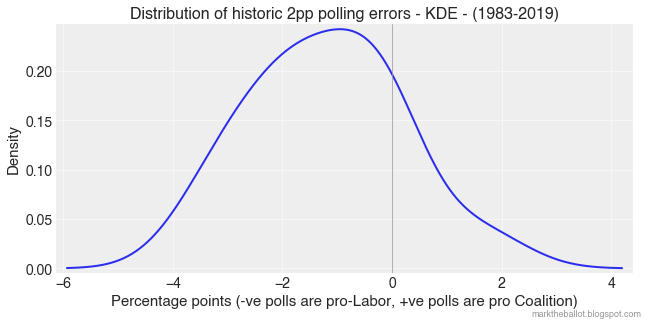

In [18]:
polling_error = (tpp_poll_summary.pipe(lambda x: pd.Series(x.values, x.index.year)) 
                 - historic_vote_data.Coalition2pp).dropna()
fig, ax = common.initiate_plot()
polling_error.plot.kde(ax=ax)
ax.axvline(0, c='#999999', lw=0.75)
common.plot_finalise(ax,
                     title='Distribution of historic 2pp polling errors - KDE - '
                           f'({polling_error.index.min()}-{polling_error.index.max()})',
                     xlabel='Percentage points (-ve polls are pro-Labor, +ve polls are pro Coalition)',
                     ylabel='Density')

### 2pp to seat conversion performance (adjusted for minor parties)

Historically, Labor has underperformed when it comes to converting its 2pp vote share into seats

In [19]:
adjusted_seats = seats_won.copy()
adjusted_seats.index = adjusted_seats.index.year
adjusted_seats = adjusted_seats.loc[minors.index]
adjusted_seats['Coalition adjusted'] = adjusted_seats['L+NP'] + minors['Coalition minor']
adjusted_seats['Labor adjusted'] = adjusted_seats['ALP'] + minors['Minor seats'] - minors['Coalition minor']
adjusted_seats['Coalition proportion'] = adjusted_seats['Coalition adjusted'] / adjusted_seats.Total
adjusted_seats['Labor proportion'] = adjusted_seats['Labor adjusted'] / adjusted_seats.Total
adjusted_seats['CoalitionMargin'] = adjusted_seats['Coalition proportion'] - adjusted_seats['Labor proportion']

In [20]:
# let's just be sure
assert (adjusted_seats['Labor adjusted'] + adjusted_seats['Coalition adjusted'] == adjusted_seats.Total).all()

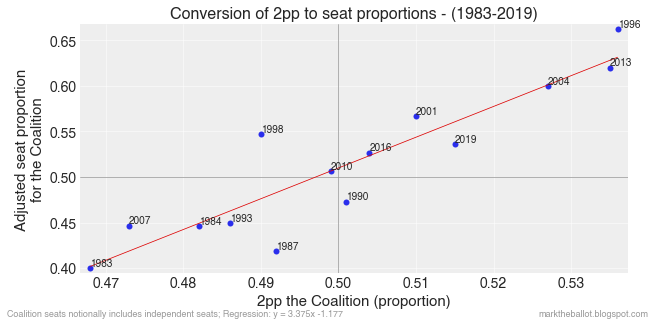

In [21]:
x, y = (
    historic_vote_data.loc[adjusted_seats.index, 'Coalition2pp'].values / 100,
    adjusted_seats['Coalition proportion'].values
)

fig, ax = common.initiate_plot()
ax.scatter(x, y)
ax.axvline(0.5, c='#999999', lw=0.75)
ax.axhline(0.5, c='#999999', lw=0.75)
annotate_dots(ax, x, y, adjusted_seats.index)
regression_text = regression_line(ax, x, y)

common.plot_finalise(ax,
                     title='Conversion of 2pp to seat proportions - '
                           f'({polling_error.index.min()}-{polling_error.index.max()})',
                     xlabel='2pp the Coalition (proportion)',
                     ylabel='Adjusted seat proportion\nfor the Coalition',
                     lfooter='Coalition seats notionally includes independent seats; ' +
                             regression_text)

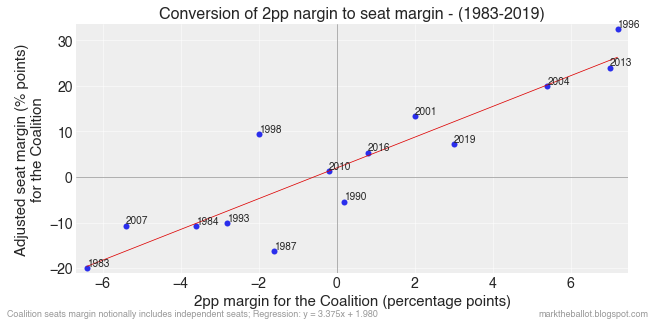

In [22]:
x, y = (
    (historic_vote_data.loc[adjusted_seats.index, 'Coalition2pp'] - 
    historic_vote_data.loc[adjusted_seats.index, 'Labor2pp']).values,
    adjusted_seats['CoalitionMargin'].values * 100
)

fig, ax = common.initiate_plot()
ax.scatter(x, y)
ax.axvline(0, c='#999999', lw=0.75)
ax.axhline(0, c='#999999', lw=0.75)
annotate_dots(ax, x, y, adjusted_seats.index)
regression_text = regression_line(ax, x, y)

common.plot_finalise(ax,
                     title='Conversion of 2pp nargin to seat margin - '
                           f'({adjusted_seats.index.min()}-{adjusted_seats.index.max()})',
                     xlabel='2pp margin for the Coalition (percentage points)',
                     ylabel='Adjusted seat margin (% points)\nfor the Coalition',
                     lfooter='Coalition seats margin notionally includes independent seats; ' +
                             regression_text)

### Conversion of "others" primary votes to seats for "others"

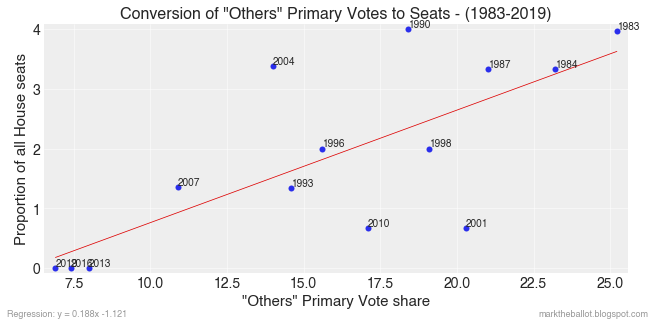

In [23]:
CUT_OFF = 1983
others_vote = historic_vote_data[['DLP', 'DEM', 'GRN', 'ON', 'Others',]].sum(axis=1, skipna=True)
others_seats = seats_won['Oth.'] / seats_won['Total'] * 100 
others_seats.index = others_seats.index.year

others_seats = others_seats[others_seats.index >= CUT_OFF]
others_vote = others_vote[others_vote.index >= CUT_OFF]

x, y = (others_vote.values, others_seats.values)

fig, ax = common.initiate_plot()
ax.scatter(x, y)
annotate_dots(ax, x, y, adjusted_seats.index)
regression_text = regression_line(ax, x, y)

common.plot_finalise(ax,
                     title='Conversion of "Others" Primary Votes to Seats - '
                           f'({others_seats.index.min()}-{others_seats.index.max()})',
                     xlabel='"Others" Primary Vote share',
                     ylabel='Proportion of all House seats',
                     lfooter=regression_text,
                    )

### Polling errors with "others" vote

A tendency for the polls to under-estimate the "others" vote 

Although the past three elections, the polls have been pretty much spot on.

In [24]:
others_poll = other_poll_summary.copy()
others_poll.index = others_poll.index.year
others_poll

1983     6.500000
1984     9.000000
1987     6.926094
1990    15.663467
1993     9.631828
1996    14.388889
1998    15.318168
2001    12.307635
2004    12.083313
2007    10.131941
2010    16.294466
2013    20.767984
2016    23.212011
2019    25.685714
dtype: float64

In [25]:
others_vote

Year
1983     6.90
1984     7.40
1987     8.00
1990    17.10
1993    10.90
1996    14.00
1998    20.30
2001    19.10
2004    15.60
2007    14.60
2010    18.40
2013    21.00
2016    23.20
2019    25.22
dtype: float64

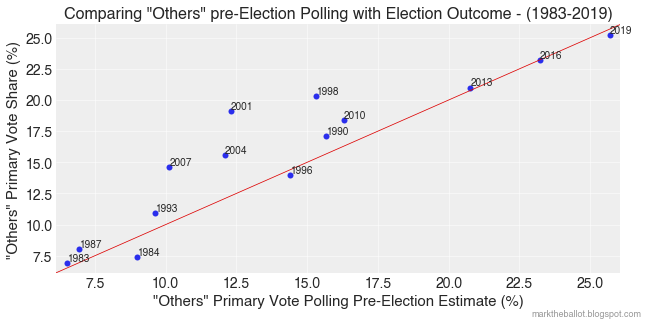

In [26]:
x, y = (others_poll.values, others_vote.values)

fig, ax = common.initiate_plot()
ax.scatter(x, y)
annotate_dots(ax, x, y, others_poll.index)
y_eq_x_line(ax)
    
common.plot_finalise(ax,
                     title='Comparing "Others" pre-Election Polling with Election Outcome - '
                           f'({others_seats.index.min()}-{others_seats.index.max()})',
                     xlabel='"Others" Primary Vote Polling Pre-Election Estimate (%)',
                     ylabel='"Others" Primary Vote Share (%)')

In [27]:
poll_error = others_poll - others_vote
poll_error

1983   -0.400000
1984    1.600000
1987   -1.073906
1990   -1.436533
1993   -1.268172
1996    0.388889
1998   -4.981832
2001   -6.792365
2004   -3.516687
2007   -4.468059
2010   -2.105534
2013   -0.232016
2016    0.012011
2019    0.465714
dtype: float64

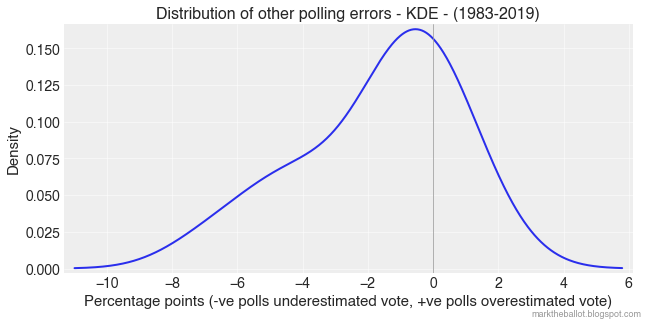

In [28]:
fig, ax = common.initiate_plot()
poll_error.plot.kde(ax=ax)
ax.axvline(0, c='#999999', lw=0.75)
common.plot_finalise(ax,
                     title='Distribution of other polling errors - KDE - '
                           f'({polling_error.index.min()}-{polling_error.index.max()})',
                     xlabel='Percentage points (-ve polls underestimated vote, +ve polls overestimated vote)',
                     ylabel='Density')

## Bayesian model

### Inputs

In [29]:
# some constants
SEATS_IN_HOUSE = 151

In [30]:
# polls and votes in whole percentage points
# we sort to ensure our lists are in the same order
polls = tpp_poll_summary.sort_index().values
votes = historic_vote_data.loc[historic_vote_data.index >= CUT_OFF, 'Coalition2pp'].sort_index().values
assert len(polls) == len(votes) # to be sure ...
polls, votes

(array([45.5       , 44.8       , 46.76      , 48.63333333, 50.2625    ,
        51.62222222, 48.91428571, 50.84      , 52.12222222, 45.91      ,
        47.64166667, 53.25333333, 50.28888889, 48.38571429]),
 array([46.8, 48.2, 49.2, 50.1, 48.6, 53.6, 49. , 51. , 52.7, 47.3, 49.9,
        53.5, 50.4, 51.5]))

In [31]:
# metric is percentage points above below 50%
c_seats = ((adjusted_seats['Coalition proportion'] - 0.5) * 100.0).sort_index().values
c_votes = (historic_vote_data.loc[adjusted_seats.index, 'Coalition2pp'] - 50.0).sort_index().values
assert len(c_seats) == len(c_votes)
c_seats, c_votes # 

(array([-10.        ,  -5.40540541,  -8.10810811,  -2.7027027 ,
         -5.10204082,  16.21621622,   4.72972973,   6.66666667,
         10.        ,  -5.33333333,   0.66666667,  12.        ,
          2.66666667,   3.64238411]),
 array([-3.2, -1.8, -0.8,  0.1, -1.4,  3.6, -1. ,  1. ,  2.7, -2.7, -0.1,
         3.5,  0.4,  1.5]))

In [32]:
@ Not used ...
c_seats_margin = adjusted_seats['CoalitionMargin'].sort_index().values * 50
c_votes_margin = (
    (historic_vote_data.loc[adjusted_seats.index, 'Coalition2pp'] - 
     historic_vote_data.loc[adjusted_seats.index, 'Labor2pp'])
).sort_index().values 
assert len(c_seats_margin) == len(c_votes_margin)
c_seats_margin, c_votes_margin

(array([-10.        ,  -5.40540541,  -8.10810811,  -2.7027027 ,
         -5.10204082,  16.21621622,   4.72972973,   6.66666667,
         10.        ,  -5.33333333,   0.66666667,  12.        ,
          2.66666667,   3.64238411]),
 array([-6.4, -3.6, -1.6,  0.2, -2.8,  7.2, -2. ,  2. ,  5.4, -5.4, -0.2,
         7. ,  0.8,  3. ]))

### The model

In [36]:
with pm.Model() as model:
    # from polls to election 2pp outcome
    polling_bias = pm.Normal('polling_bias', mu=1, sigma=1) # additive bias
    polling_error = pm.Exponential('polling_error', lam=2.0) # standard deviation
    polling_nu = pm.Gamma('polling_nu', alpha=5, beta=0.1) # Degrees of freedom for StudentT
    historic_polls_to_votes = pm.StudentT("historic_polls_to_votes", 
                                nu=polling_nu, # For StudentT
                                mu=polling_bias + polls, 
                                sigma=polling_error,
                                observed=votes,)

    # projected election 2pp result
    vote_2pp_C_predicted = pm.StudentT("vote_2pp_C_predicted", 
                                nu=polling_nu, # For StudentT
                                mu=polling_bias + current_tpp_poll,
                                sigma=polling_error,)
    vote_2pp_L_predicted = pm.Deterministic('vote_2pp_L_predicted',
                                           100.0 - vote_2pp_C_predicted)
    #vote_2pp_C_predicted_margin = pm.Deterministic('vote_2pp_C_predicted_margin',
    #                                       vote_2pp_C_predicted - vote_2pp_L_predicted)
    
    # historic conversion of 2pp Election result to seats 
    # (before the minor parties get a bite at those seats).
    # This is a classic linear regression model
    sm_muliplier = pm.Normal('sm_muliplier', mu=1, sigma=10) 
    sm_adjust = pm.Normal('sm_adjust', mu=0, sigma=10)
    sm_error = pm.Exponential('sm_error', lam=2.0)
    sm_nu = pm.Gamma('sm_nu', alpha=5, beta=0.1) 
    historic_votes_to_seats = pm.StudentT('historic_votes_to_seats',
                                          nu=sm_nu,
                                          mu=c_votes*sm_muliplier+sm_adjust,
                                          sigma=sm_error,
                                          observed=c_seats,)
    
    # projected notional Coalition seats margin (before independents and minor parties)
    seats_C_percent_notional_projected = pm.StudentT('seats_C_percent_notional_projected',
                                          nu=sm_nu,
                                          mu=(vote_2pp_C_predicted-50.0)*sm_muliplier+sm_adjust,
                                          sigma=sm_error,)
    seats_C_count_notional_projected = pm.Deterministic('seats_C_count_notional_projected',
                                          SEATS_IN_HOUSE * (seats_C_percent_notional_projected+50)/100)
    seats_L_count_notional_projected = pm.Deterministic('seats_L_count_notional_projected',
                                          SEATS_IN_HOUSE - seats_C_count_notional_projected)


### Graphical representation of the model

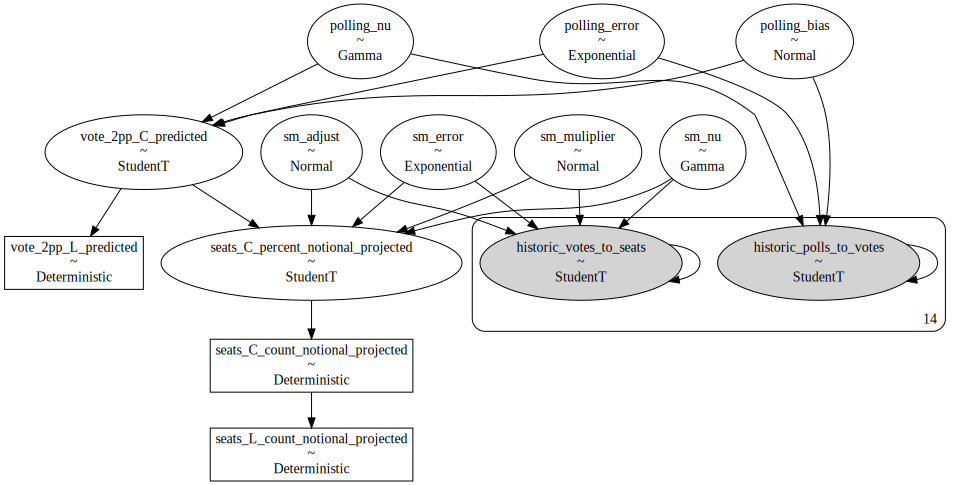

In [37]:
# a graphical output of the model
gv = pm.model_to_graphviz(model)
gv.render(format='png', filename='model-graphviz')
display(gv)

### Sampling - conditioning the data to the model

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (5 chains in 5 jobs)
NUTS: [polling_bias, polling_error, polling_nu, vote_2pp_C_predicted, sm_muliplier, sm_adjust, sm_error, sm_nu, seats_C_percent_notional_projected]


Sampling 5 chains for 5_000 tune and 20_000 draw iterations (25_000 + 100_000 draws total) took 34 seconds.


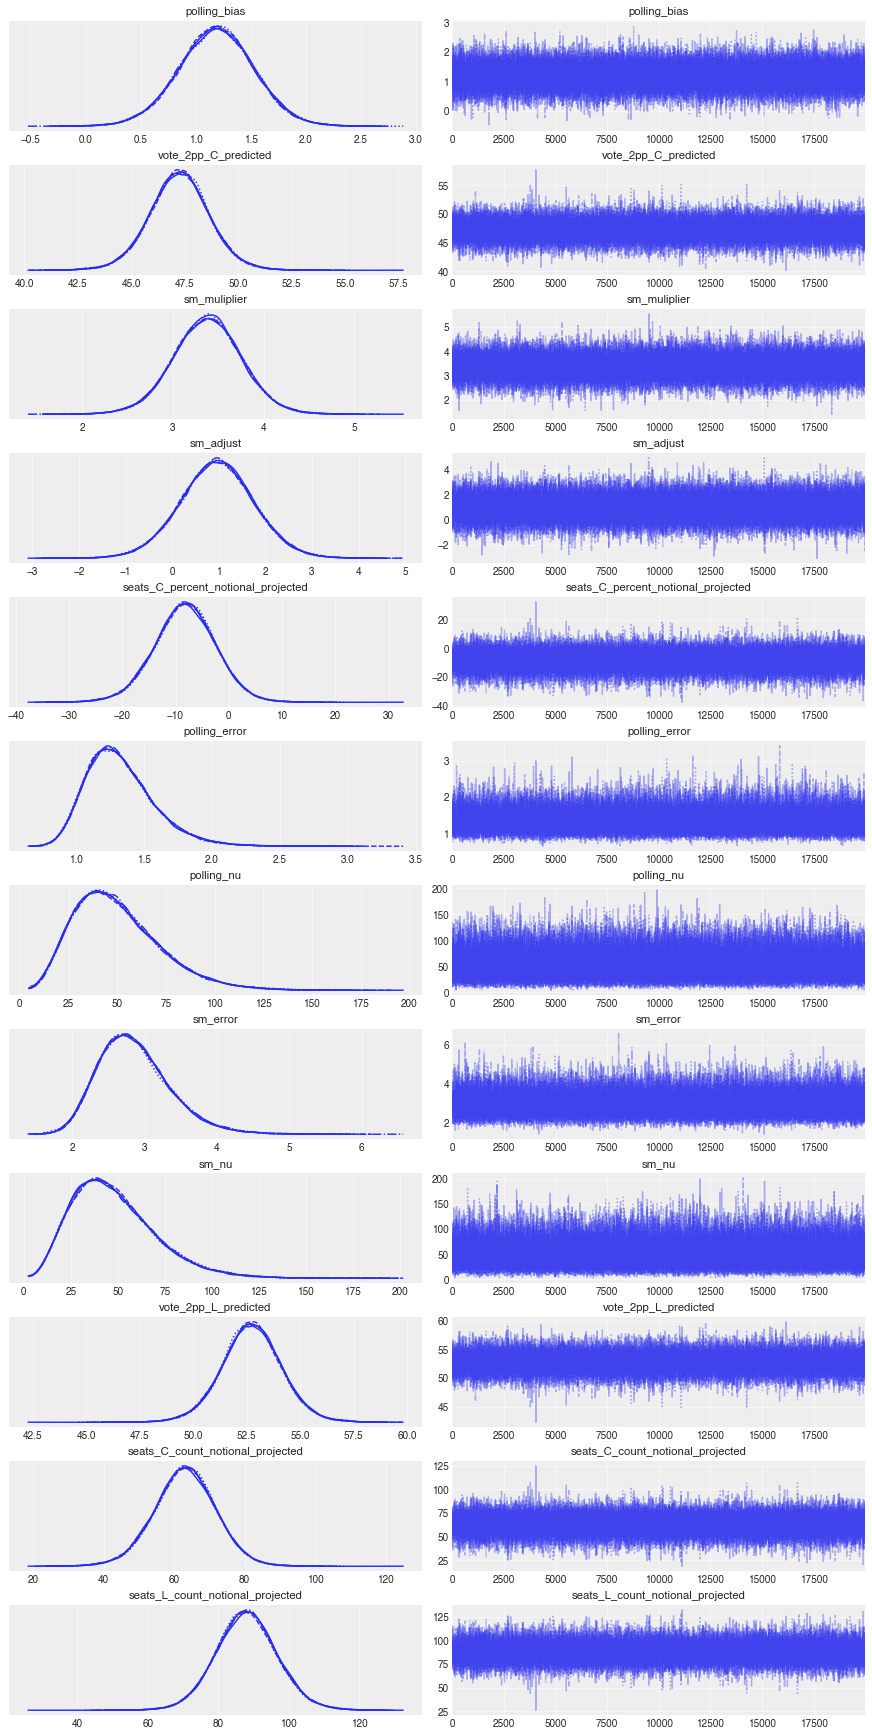

In [38]:
# sampling 
with  model:
    trace = pm.sample(return_inferencedata=True, draws=20_000, tune=5_000, chains=5, cores=5, )
    summary = az.summary(trace) 
    az.plot_trace(trace)      

### Charting the results

## Test bed